## GW190412 Populations Analysis Results

In [30]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cp = sns.color_palette("colorblind", 6)

parameter names: MMax, MMin, beta, gamma
population runs: O2-IMRPhenomPv3HM, O2-SEOBNRv4PHM, O2GW190412-IMRPhenomPv3HM, O2GW190412-SEOBNRv4PHM


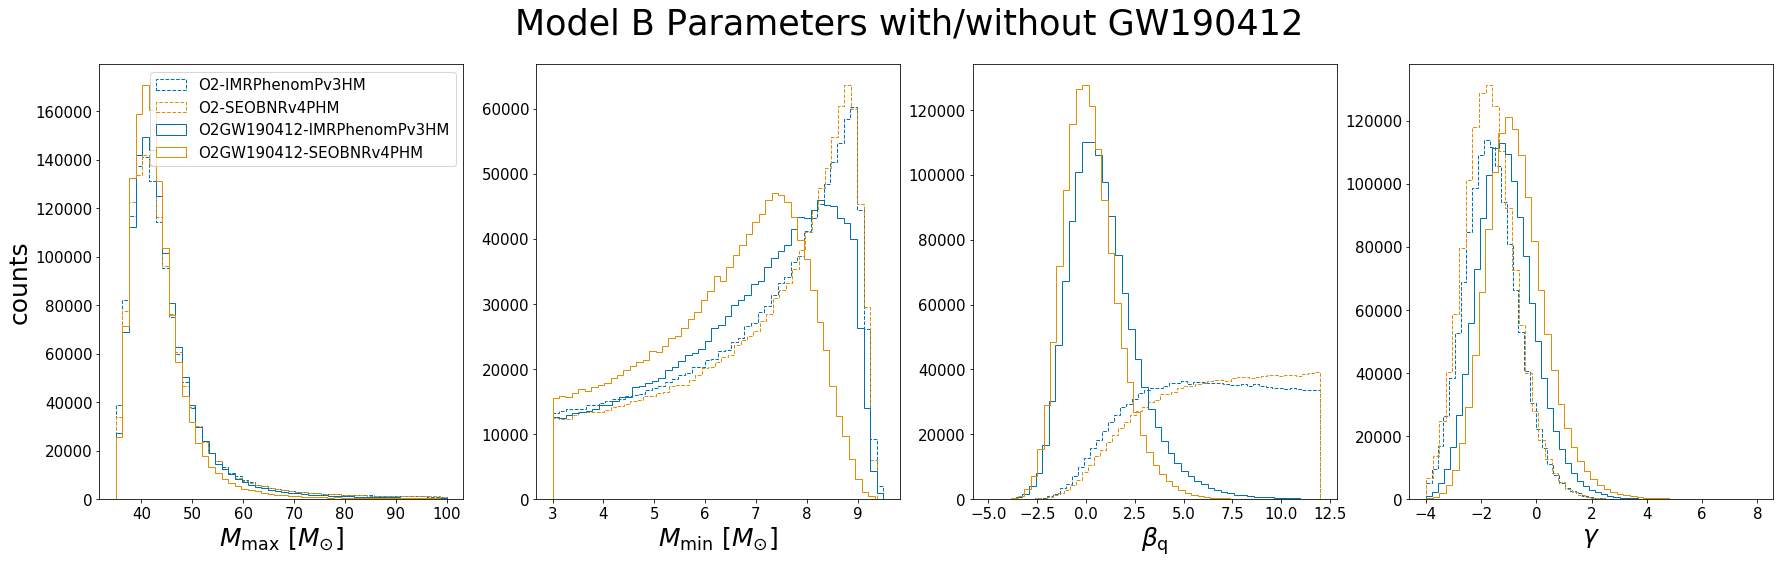

In [54]:
fig, axs = plt.subplots(1,4, figsize=(30,8))

with h5py.File('GW190412_posterior_samples.h5', 'r') as f:

    # read in parameter names
    parameter_names = [item.decode("utf-8") for item in f['ModelB']['posterior_samples']['parameter_names']]
    print("parameter names: {}".format(", ".join(parameter_names)))
    
    # get the names of all the population runs in the file
    population_runs = list(f['ModelB']['posterior_samples'].keys())
    population_runs.remove('parameter_names')
    print("population runs: {}".format(", ".join(population_runs)))
    
    for pop in population_runs:
        # read data for this population run
        data = np.asarray(f['ModelB']['posterior_samples'][pop])
        
        # plot histogram for each param
        for idx in np.arange(len(parameter_names)):
            # set linestyle
            ls = '-' if 'O2GW190412-' in pop else '--'
            # set color
            col = cp[0] if 'IMRPhenomPv3HM' in pop else cp[1]
                
            # set color
            axs[idx].hist(data[idx], bins=50, histtype='step', color=col, linestyle=ls, label=pop)
        
        
# format plot
params_dict = {'MMax':r'$M_{\rm max}\ [M_{\odot}]$', 'MMin':r'$M_{\rm min}\ [M_{\odot}]$', \
                           'beta':r'$\beta_{\rm q}$', 'gamma':r'$\gamma$'}
for ax, param in zip(axs, parameter_names):
    ax.set_xlabel(params_dict[param], fontsize=25)
    ax.tick_params(axis='both', labelsize=15)
axs[0].set_ylabel('counts', fontsize=25)
axs[0].legend(prop={'size':15})
_ = fig.suptitle('Model B Parameters with/without GW190412',  fontsize=35)